# UNIVERSITY ADMIT ELIGIBILITY PREDICTOR

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Dataset

In [1]:
df = pd.read_csv("D:\NT\Admission_Predict.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: malformed \N character escape (1340464002.py, line 1)

# Analyse the Data

In [37]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


# Drop the serial No column

In [39]:
df.drop("Serial No.",axis=1,inplace=True)

In [40]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Checking for null value

In [41]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# getting information about the dataframe

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# statistical summary of the dataframe

In [43]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# To find the correlation of columns

In [44]:
corr_matrix=df.corr()

In [45]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


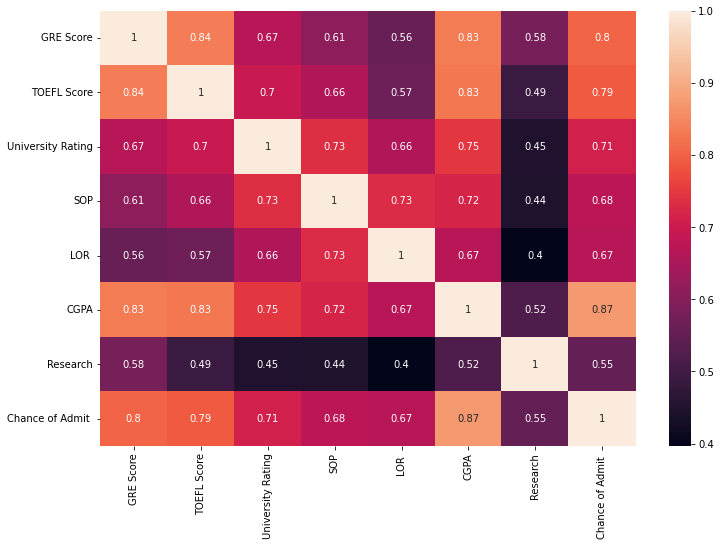

In [46]:
#plotting the correlation matrix as a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Data Visualization

Univarient Analysis

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

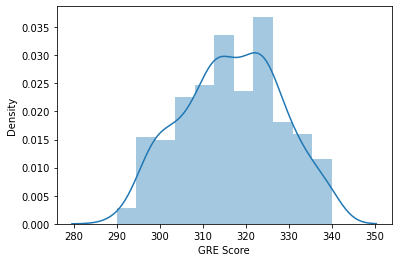

In [47]:
sns.distplot(df["GRE Score"])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

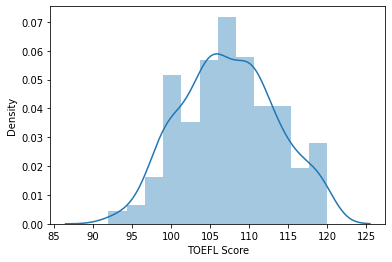

In [48]:
sns.distplot(df["TOEFL Score"])

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

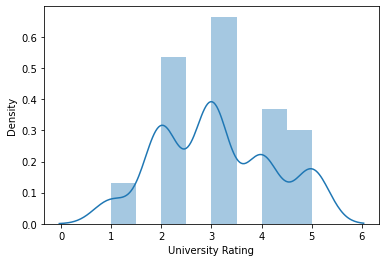

In [49]:
sns.distplot(df["University Rating"])

<AxesSubplot:xlabel='SOP', ylabel='Density'>

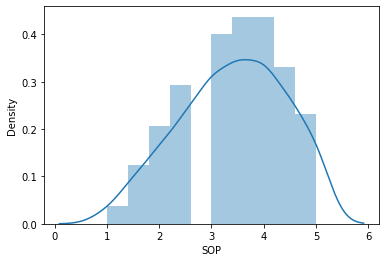

In [50]:
sns.distplot(df["SOP"])

<AxesSubplot:xlabel='LOR ', ylabel='Density'>

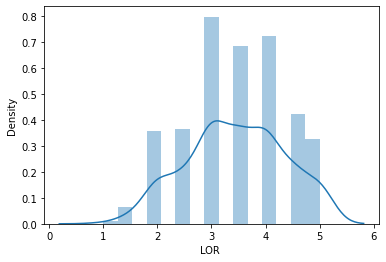

In [51]:
sns.distplot(df["LOR "])

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

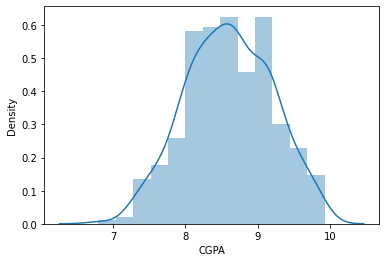

In [52]:
sns.distplot(df["CGPA"])

<AxesSubplot:xlabel='Research', ylabel='Density'>

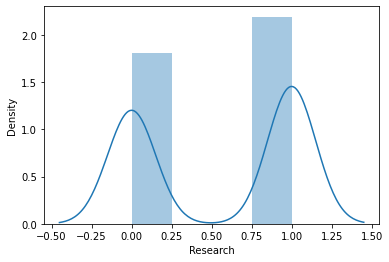

In [53]:
sns.distplot(df["Research"])

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

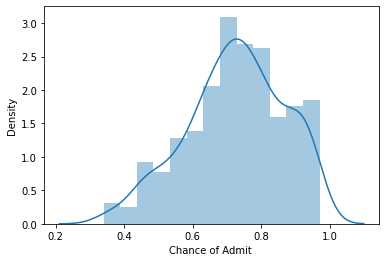

In [54]:
sns.distplot(df["Chance of Admit "])

Bivarient Analysis

plotting data which have high correlation

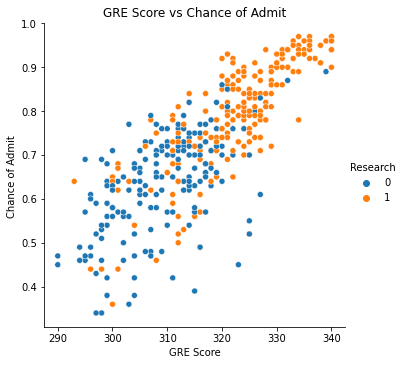

In [55]:
sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

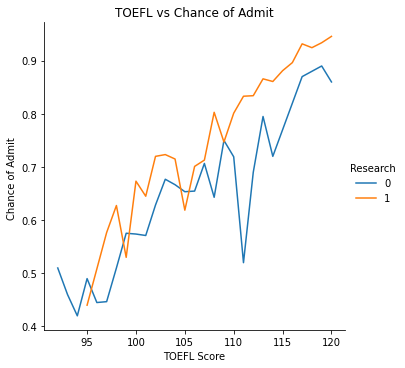

In [56]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("TOEFL vs Chance of Admit")
plt.show()

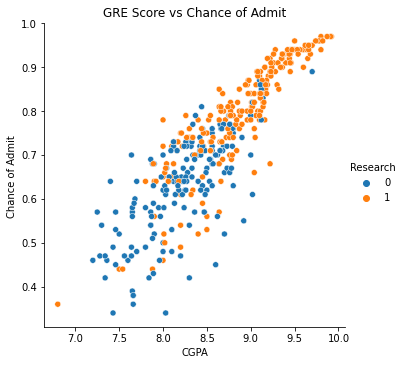

In [57]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research")
plt.title("GRE Score vs Chance of Admit")
plt.show()

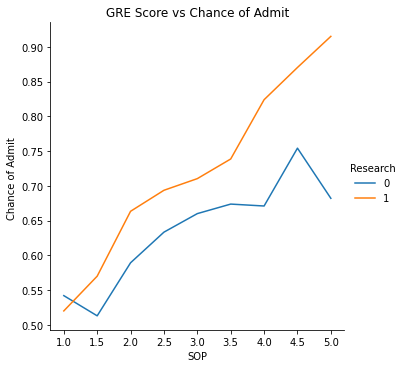

In [58]:
sns.relplot(data=df,x="SOP",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

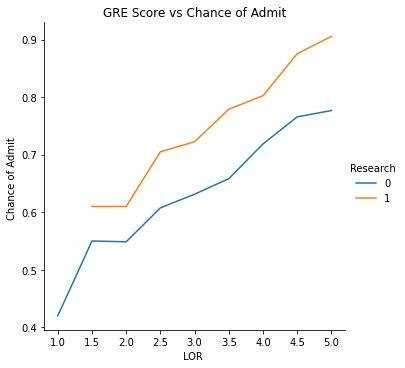

In [59]:
sns.relplot(data=df,x="LOR ",y="Chance of Admit ",hue="Research",kind="line",ci=None)
plt.title("GRE Score vs Chance of Admit")
plt.show()

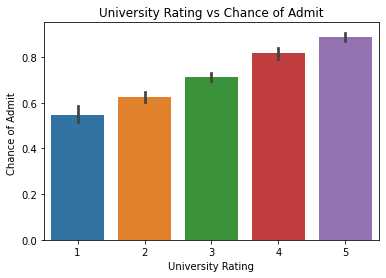

In [60]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ")
plt.title("University Rating vs Chance of Admit")
plt.show()

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

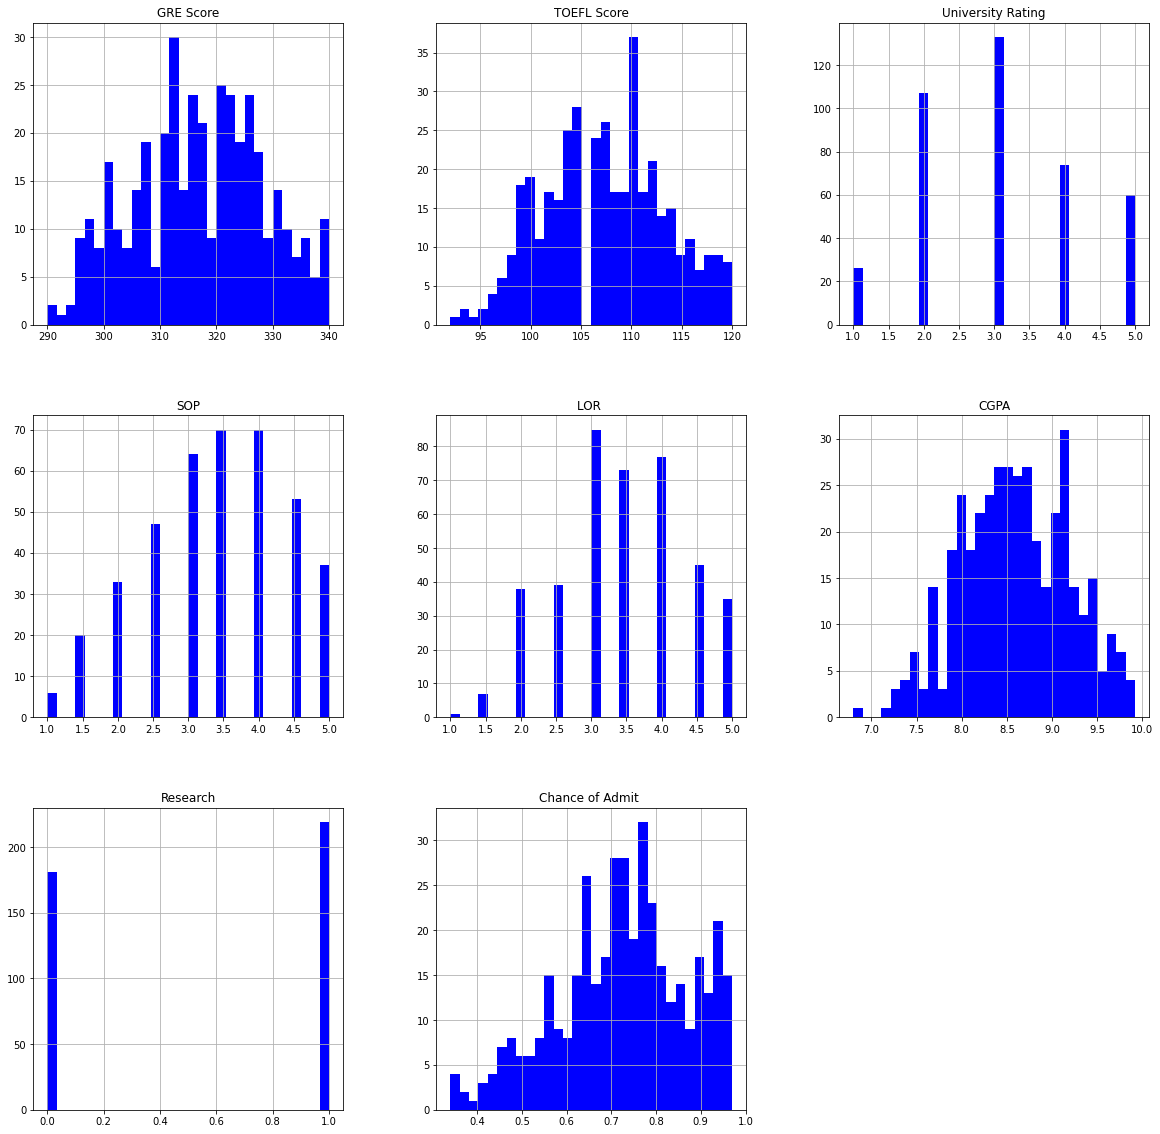

In [61]:
df.hist(bins = 30, figsize = (20,20), color = 'blue')

# Importing the required libraries for regression model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the dataset into dependent column and independent column

In [63]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit "]

In [64]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [65]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# Spliting the dataset into training and testing data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# MULTIPLE LINEAR REGRESSION

In [68]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.806


# RANDOM FOREST REGRESSION

In [69]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=1)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.771


# Conclusion

R^2 score is an indicator of accuracy of Regression Models, and the accuracy is measured as close to 1 of this value.
Therefore, as seen, Multiple Linear Regression Model is better than Random Forest Regression on 
this dataset when comparing their R^2 scores.

In [70]:
import pickle

In [71]:
pickle.dump(multiple_lin_reg,open("model.pkl","wb"))